<a href="https://colab.research.google.com/github/Salva13s/TrabajoPneumonia/blob/main/TransferLearning_VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install medmnist
!pip install --upgrade medmnist

In [2]:
from tqdm import tqdm
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import img_to_array, array_to_img
import medmnist
from medmnist import INFO, Evaluator
from skimage.color import gray2rgb

In [3]:
data_flag = 'pneumoniamnist'

download = True

NUM_EPOCHS = 3
BATCH_SIZE = 128
lr = 0.001

info = INFO[data_flag]
task = info['task']
n_channels = info['n_channels']
n_classes = len(info['label'])

DataClass = getattr(medmnist, info['python_class'])

In [4]:
# load the data
train_dataset = DataClass(split='train',  download=download)
test_dataset = DataClass(split='test',  download=download)
val_dataset = DataClass(split="val", download=download)

100%|██████████| 4170669/4170669 [00:10<00:00, 412191.88it/s]


Using downloaded and verified file: /root/.medmnist/pneumoniamnist.npz
Using downloaded and verified file: /root/.medmnist/pneumoniamnist.npz


In [6]:
# Cargar los datos
train_images = train_dataset.imgs
train_labels = train_dataset.labels
test_images = test_dataset.imgs
test_labels = test_dataset.labels
val_images = val_dataset.imgs
val_labels = val_dataset.labels

In [9]:
train_images_rgb = gray2rgb(train_images)
test_images_rgb = gray2rgb(test_images)
val_images_rgb = gray2rgb(val_images)

In [10]:
train_images_resized = np.array([img_to_array(array_to_img(img).resize((32, 32))) for img in train_images_rgb])
test_images_resized = np.array([img_to_array(array_to_img(img).resize((32, 32))) for img in test_images_rgb])
val_images_resized = np.array([img_to_array(array_to_img(img).resize((32, 32))) for img in val_images_rgb])

In [11]:
train_images = train_images_resized.astype('float32') / 255.0
test_images = test_images_resized.astype('float32') / 255.0
val_images = val_images_resized.astype('float32') / 255.0

In [12]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

base_model.trainable = False

model = keras.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy',"AUC","binary_accuracy","TruePositives","TrueNegatives","FalsePositives","FalseNegatives"])

58889256/58889256 [==============================] - 0s 0us/step


In [13]:
H = model.fit(train_images, train_labels, epochs=NUM_EPOCHS, batch_size=BATCH_SIZE,validation_data=(val_images, val_labels))

Epoch 1/3
37/37 [==============================] - 58s 2s/step - loss: 0.4032 - accuracy: 0.8165 - auc: 0.8560 - binary_accuracy: 0.8165 - true_positives: 3277.0000 - true_negatives: 567.0000 - false_positives: 647.0000 - false_negatives: 217.0000 - val_loss: 0.2933 - val_accuracy: 0.8893 - val_auc: 0.9301 - val_binary_accuracy: 0.8893 - val_true_positives: 367.0000 - val_true_negatives: 99.0000 - val_false_positives: 36.0000 - val_false_negatives: 22.0000
Epoch 2/3
37/37 [==============================] - 61s 2s/step - loss: 0.2532 - accuracy: 0.8936 - auc: 0.9502 - binary_accuracy: 0.8936 - true_positives: 3298.0000 - true_negatives: 909.0000 - false_positives: 305.0000 - false_negatives: 196.0000 - val_loss: 0.2356 - val_accuracy: 0.9084 - val_auc: 0.9599 - val_binary_accuracy: 0.9084 - val_true_positives: 365.0000 - val_true_negatives: 111.0000 - val_false_positives: 24.0000 - val_false_negatives: 24.0000
Epoch 3/3
37/37 [==============================] - 56s 2s/step - loss: 0.2105

In [14]:
import matplotlib.pyplot as plt
history_dict = H.history
print(history_dict.keys())

dict_keys(['loss', 'accuracy', 'auc', 'binary_accuracy', 'true_positives', 'true_negatives', 'false_positives', 'false_negatives', 'val_loss', 'val_accuracy', 'val_auc', 'val_binary_accuracy', 'val_true_positives', 'val_true_negatives', 'val_false_positives', 'val_false_negatives'])


In [17]:
print("Perdida en set de entrenamiento",history_dict["loss"][len(history_dict["loss"])-1])
print("Perdida en set de validacion",history_dict["val_loss"][len(history_dict["val_loss"])-1])
print("------------------------------------------------------------------------------------")
print("Accuracy en set de entrenamiento",history_dict["accuracy"][len(history_dict["accuracy"])-1])
print("Accuracy en set de validacion",history_dict["val_accuracy"][len(history_dict["val_accuracy"])-1])
print("------------------------------------------------------------------------------------")
print("Auc en set de entrenamiento",history_dict["auc"][len(history_dict["auc"])-1])
print("Auc en set de validacion",history_dict["val_auc"][len(history_dict["val_auc"])-1])
print("------------------------------------------------------------------------------------")
print("Binary_accuracy en set de entrenamiento",history_dict["binary_accuracy"][len(history_dict["binary_accuracy"])-1])
print("Binary_accuracy en set de validacion",history_dict["val_binary_accuracy"][len(history_dict["val_binary_accuracy"])-1])

Perdida en set de entrenamiento 0.2105226367712021
Perdida en set de validacion 0.1991925984621048
------------------------------------------------------------------------------------
Accuracy en set de entrenamiento 0.9211979508399963
Accuracy en set de validacion 0.9255725145339966
------------------------------------------------------------------------------------
Auc en set de entrenamiento 0.9676007032394409
Auc en set de validacion 0.9744834303855896
------------------------------------------------------------------------------------
Binary_accuracy en set de entrenamiento 0.9211979508399963
Binary_accuracy en set de validacion 0.9255725145339966


In [16]:
print("Verdaderos negativos set entrenamiento: ",history_dict["true_negatives"][len(history_dict["true_negatives"])-1])
print("------------------------------------------------")
print("Verdaderos negativos set de testeo: ",history_dict["val_true_negatives"][len(history_dict["val_true_negatives"])-1])
print("------------------------------------------------")
print("Verdaderos positivos set entrenamiento: ",history_dict["true_positives"][len(history_dict["true_positives"])-1])
print("------------------------------------------------")
print("Verdaderos positivos set de testeo: ",history_dict["val_true_positives"][len(history_dict["val_true_positives"])-1])
print("------------------------------------------------")
print("Falsos negativos set entrenamiento: ",history_dict["false_negatives"][len(history_dict["false_negatives"])-1])
print("------------------------------------------------")
print("Falsos negativos set de testeo: ",history_dict["val_false_negatives"][len(history_dict["val_false_negatives"])-1])
print("------------------------------------------------")
print("Falsos positivos set entrenamiento: ",history_dict["false_positives"][len(history_dict["false_positives"])-1])
print("------------------------------------------------")
print("Falsos positivos set de testeo: ",history_dict["val_false_positives"][len(history_dict["val_false_positives"])-1])

Verdaderos negativos set entrenamiento:  1003.0
------------------------------------------------
Verdaderos negativos set de testeo:  116.0
------------------------------------------------
Verdaderos positivos set entrenamiento:  3334.0
------------------------------------------------
Verdaderos positivos set de testeo:  369.0
------------------------------------------------
Falsos negativos set entrenamiento:  160.0
------------------------------------------------
Falsos negativos set de testeo:  20.0
------------------------------------------------
Falsos positivos set entrenamiento:  211.0
------------------------------------------------
Falsos positivos set de testeo:  19.0


<Figure size 640x480 with 0 Axes>

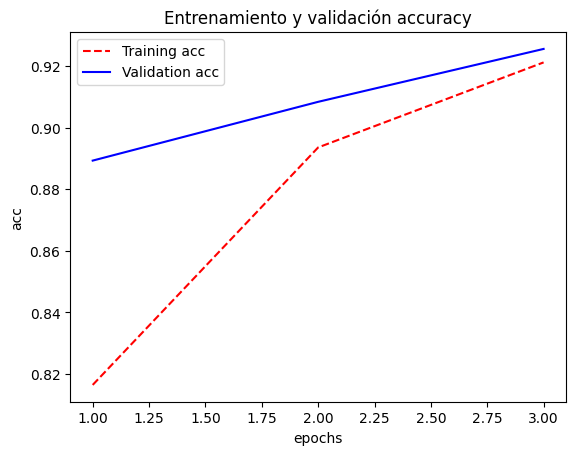

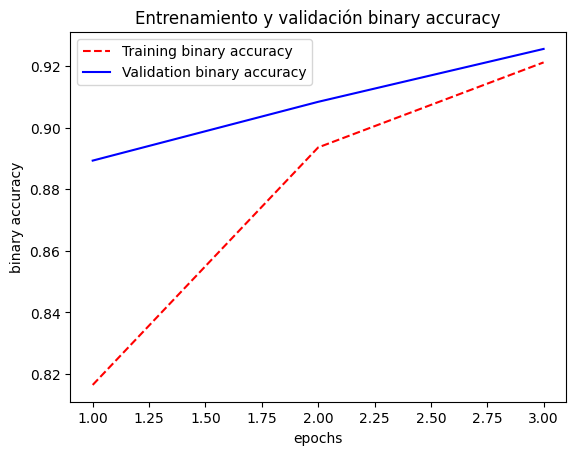

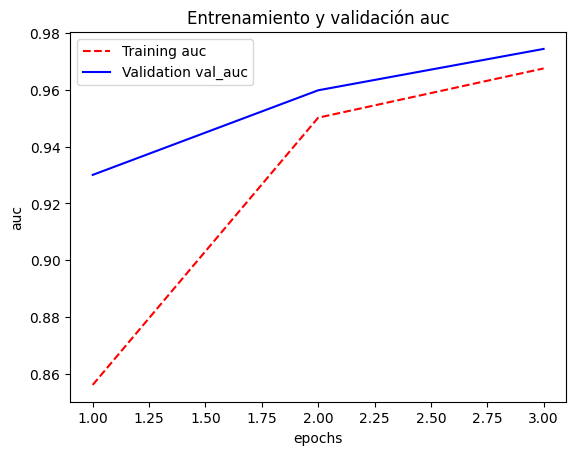

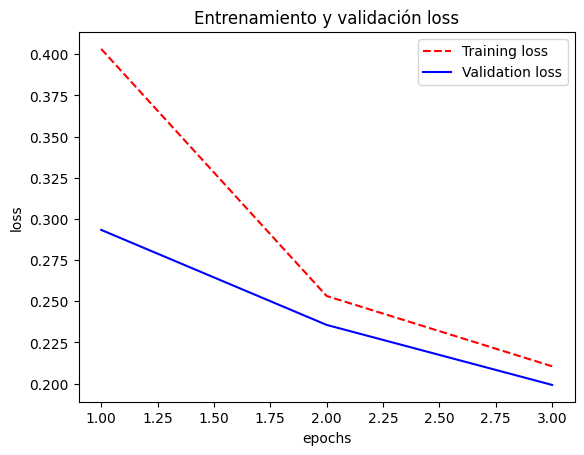

<Figure size 640x480 with 0 Axes>

In [18]:
acc      = H.history[     'accuracy' ]
val_acc  = H.history[ 'val_accuracy' ]
loss     = H.history[    'loss' ]
val_loss = H.history['val_loss' ]
auc = H.history["auc"]
val_auc = H.history['val_auc']
binary_accuracy = H.history['binary_accuracy']
val_binary_accuracy = H.history["val_binary_accuracy"]

epochs   = range(1,len(acc)+1,1)



plt.plot ( epochs,     acc, 'r--', label='Training acc'  )
plt.plot ( epochs, val_acc,  'b', label='Validation acc')
plt.title ('Entrenamiento y validación accuracy')
plt.ylabel('acc')
plt.xlabel('epochs')

plt.legend()
plt.figure()

plt.plot ( epochs,     binary_accuracy, 'r--', label='Training binary accuracy'  )
plt.plot ( epochs, val_binary_accuracy,  'b', label='Validation binary accuracy')
plt.title ('Entrenamiento y validación binary accuracy')
plt.ylabel('binary accuracy')
plt.xlabel('epochs')

plt.legend()
plt.figure()

plt.plot ( epochs,     auc, 'r--', label='Training auc'  )
plt.plot ( epochs, val_auc,  'b', label='Validation val_auc')
plt.title ('Entrenamiento y validación auc')
plt.ylabel('auc')
plt.xlabel('epochs')

plt.legend()
plt.figure()

plt.plot ( epochs,     loss, 'r--' , label='Training loss'  )
plt.plot ( epochs, val_loss ,  'b', label='Validation loss' )
plt.title ('Entrenamiento y validación loss'   )
plt.ylabel('loss')
plt.xlabel('epochs')

plt.legend()
plt.figure()

In [19]:
predictions = model.predict(test_images)

20/20 [==============================] - 8s 379ms/step


In [20]:
X = 1
print("Predccion del modelo segun porcentaje de seguridad acerca de si es un pulmon normal: ", predictions[X])
print("Etiqueta real: ",test_labels[X])

Predccion del modelo segun porcentaje de seguridad acerca de si es un pulmon normal:  [0.9329692]
Etiqueta real:  [0]


In [21]:
class_names = ["normal", "pneumonia"]

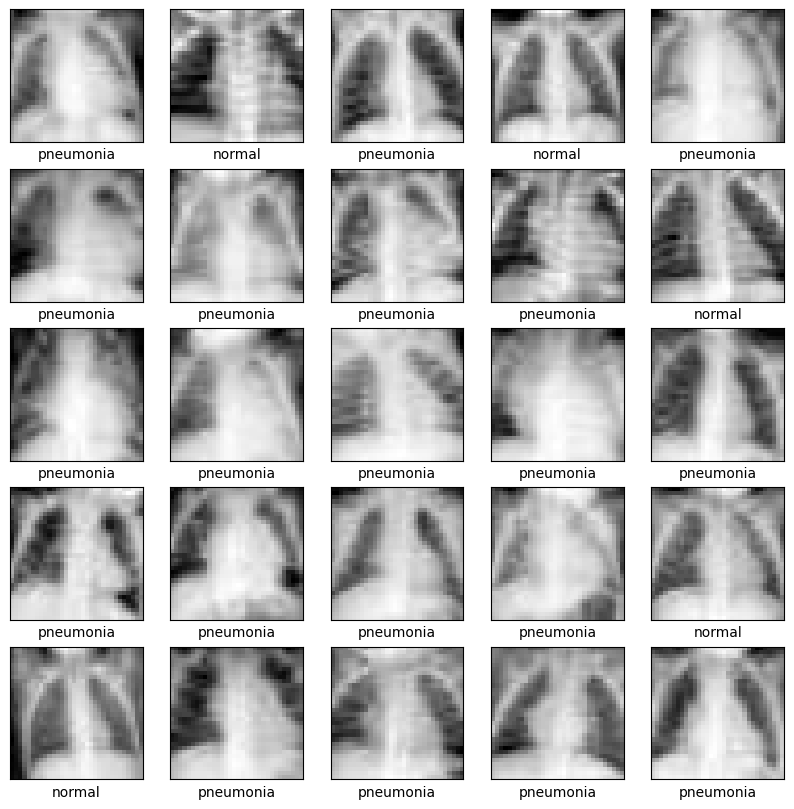

In [22]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[test_labels[i][0]])
plt.show()

In [42]:
train_labels2 = train_labels.flatten()
test_labels2 = test_labels.flatten()
val_labels2 = val_labels.flatten()


In [43]:
train_labels3 = np.array(train_labels2)
val_labels3 = np.array(val_labels2)
test_labels3 = np.array(test_labels2)

In [44]:
import matplotlib.pyplot as plt

def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i][0], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)
    predicted_label = {"Prediccion ": (round(predictions_array, 3)), "Etiqueta real ": true_label}
    plt.xlabel(predicted_label)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i][0], true_label[i]
    plt.grid(False)
    plt.xticks(range(2))
    yticks = ['0', '1']
    y = [0, 1]
    plt.yticks(y, yticks)

    plt.subplots_adjust(right=1.0)
    thisplot = plt.bar("Predicción", predictions_array, color ="purple" )
    for bar in thisplot:
      bar.set_width(0.85)
    plt.xlim(-1, 0.5)
    plt.axhline(y=1.0, color="black", linestyle="--")

20/20 [==============================] - 6s 307ms/step


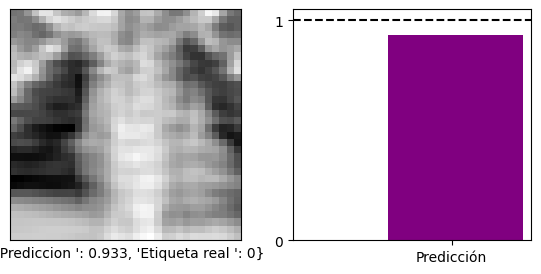

In [46]:
i = 1
predictions = model.predict(test_images)  # Realiza predicciones en los datos de prueba

plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions, test_labels3, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions, test_labels3)
plt.show()

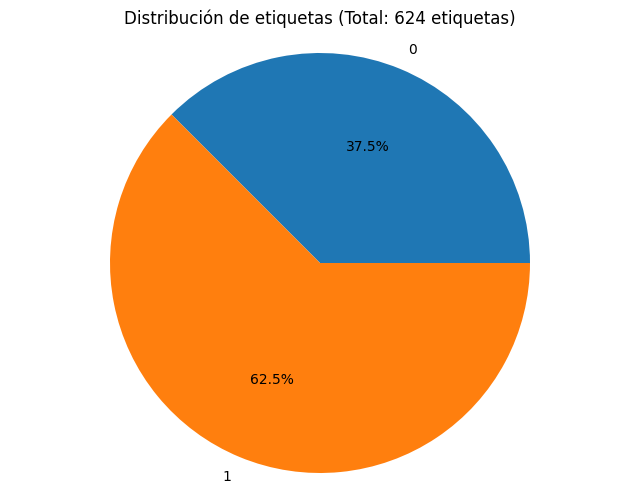

In [47]:
import matplotlib.pyplot as plt
import numpy as np

# Obtener la cantidad de imágenes por etiqueta
unique_labels, label_counts = np.unique(test_labels, return_counts=True)
total_labels = len(test_labels)  # Cantidad total de etiquetas

# Crear el gráfico de torta
plt.figure(figsize=(8, 6))
plt.pie(label_counts, labels=unique_labels, autopct='%1.1f%%')
plt.title(f'Distribución de etiquetas (Total: {total_labels} etiquetas)')
plt.axis('equal')
plt.show()

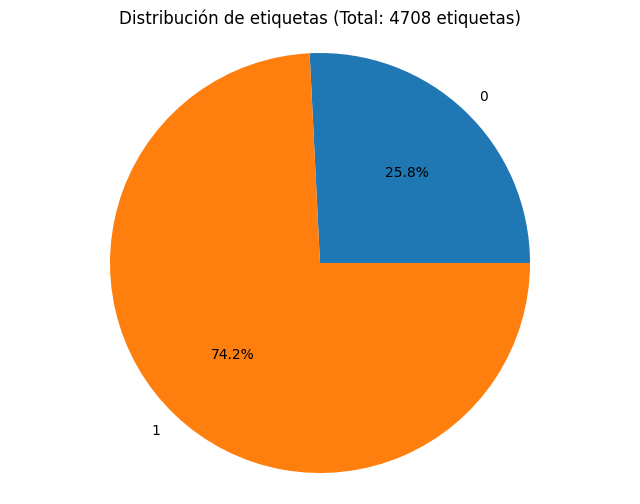

In [48]:
import matplotlib.pyplot as plt
import numpy as np

# Obtener la cantidad de imágenes por etiqueta
unique_labels, label_counts = np.unique(train_labels, return_counts=True)
total_labels = len(train_labels)  # Cantidad total de etiquetas

# Crear el gráfico de torta
plt.figure(figsize=(8, 6))
plt.pie(label_counts, labels=unique_labels, autopct='%1.1f%%')
plt.title(f'Distribución de etiquetas (Total: {total_labels} etiquetas)')
plt.axis('equal')
plt.show()



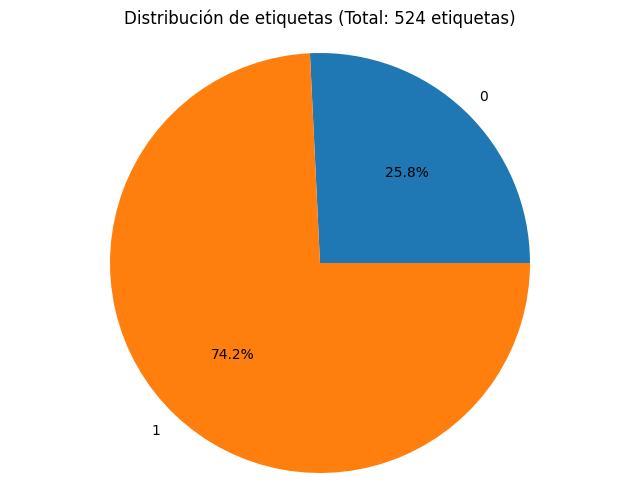

In [49]:
import matplotlib.pyplot as plt
import numpy as np

# Obtener la cantidad de imágenes por etiqueta
unique_labels, label_counts = np.unique(val_labels, return_counts=True)
total_labels = len(val_labels)  # Cantidad total de etiquetas

# Crear el gráfico de torta
plt.figure(figsize=(8, 6))
plt.pie(label_counts, labels=unique_labels, autopct='%1.1f%%')
plt.title(f'Distribución de etiquetas (Total: {total_labels} etiquetas)')
plt.axis('equal')
plt.show()
